We are given a dataset of patients to be tested for heart disease. Features
are given below.
• age
• sex – Male, Female
• cp - chest pain type (4 values)
• trestbps - resting blood pressure
• chol - serum cholestoral in mg/dl
• fbs - fasting blood sugar > 120 mg/dl
• restecg - resting electrocardiographic results, values: 0,1,2
• thalach - maximum heart rate achieved
• exang - exercise induced angina
• oldpeak - ST depression induced by exercise relative to rest
• slope - the slope of the peak exercise ST segment
• ca - number of major vessels colored by flourosopy, values: 0,1,2,3,4
• thal - values: 0,1,2,3
• target – is the column we want to predict.

We asked to create Support Vector Machine (with both Linear and RBF kernel) classifier, Decision
Tree classifier, Random Forest classifier, Logistic Regression, Naïve Bayes classifier, KNN classifier to
predict whether patients have heart disease or not and decide which algorithm performs the best on
average.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt  
import seaborn as sns


In [126]:
data = pd.read_csv("heart.csv")

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [127]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [129]:
countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [4]:
data.isnull().sum().any()

False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


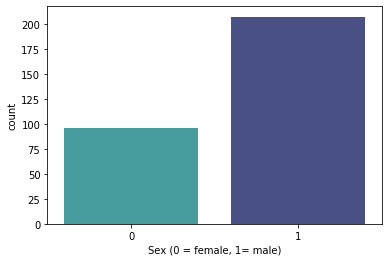

In [24]:
sns.countplot(x='sex', data=data, palette="mako_r")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [8]:
countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(data.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [9]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


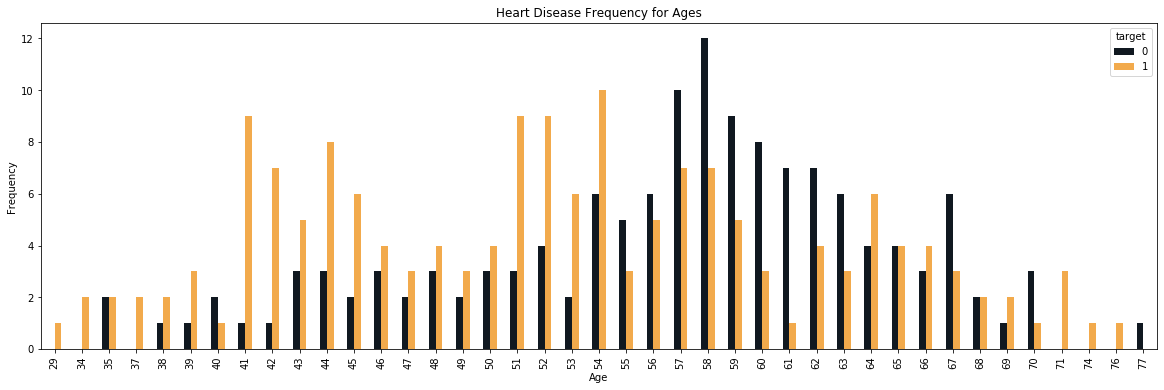

In [25]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6),color=['#101820','#f2aa4c'])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

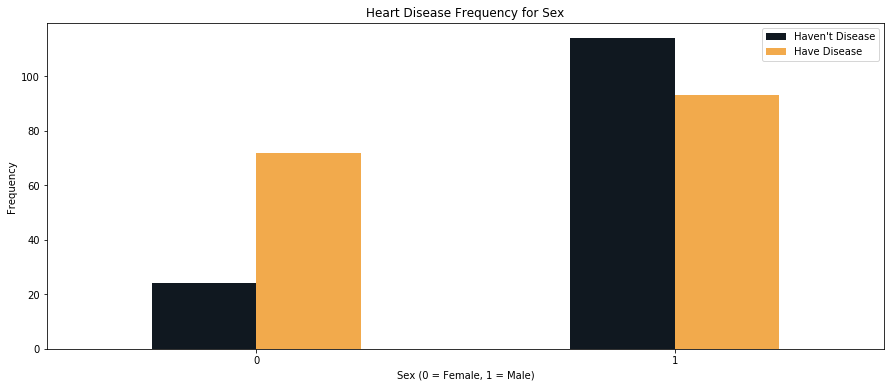

In [20]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6),color=['#101820','#f2aa4c' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()


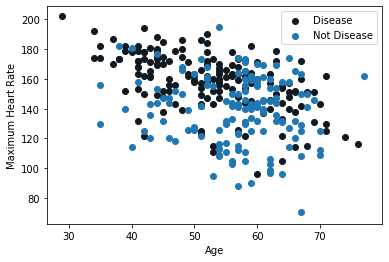

In [30]:
plt.scatter(x=data.age[data.target==1], y=data.thalach[(data.target==1)],color=['#101820'])
plt.scatter(x=data.age[data.target==0], y=data.thalach[(data.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

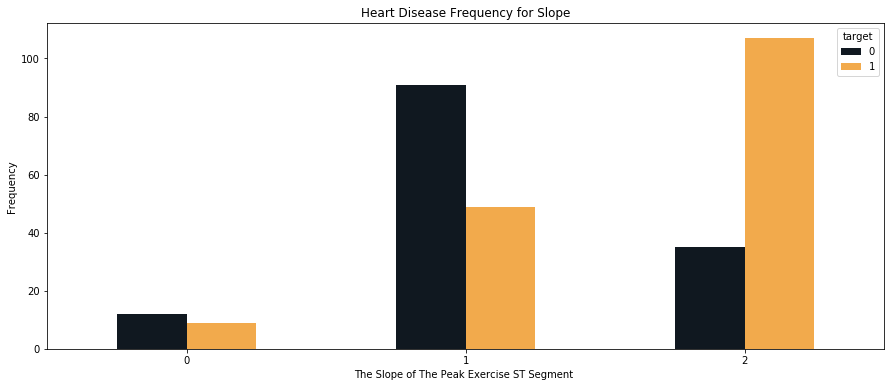

In [33]:
pd.crosstab(data.slope,data.target).plot(kind="bar",figsize=(15,6),color=['#101820','#f2aa4c' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

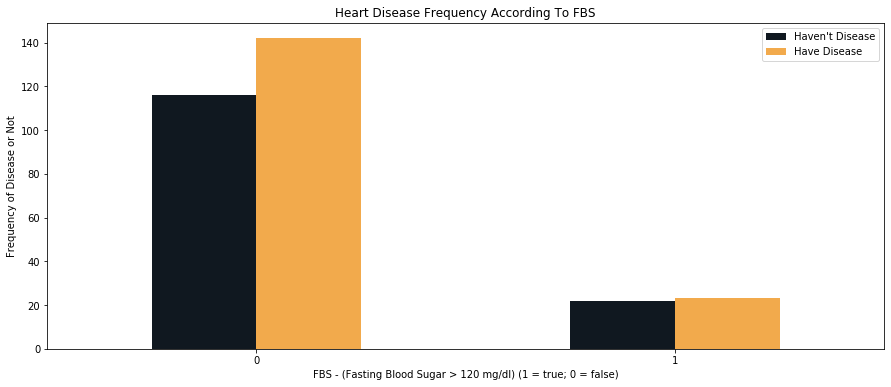

In [35]:
pd.crosstab(data.fbs,data.target).plot(kind="bar",figsize=(15,6),color=['#101820','#f2aa4c'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

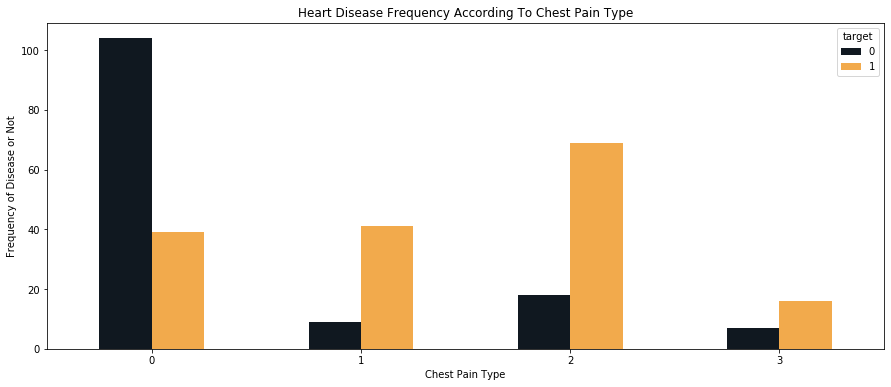

In [38]:
pd.crosstab(data.cp,data.target).plot(kind="bar",figsize=(15,6),color=['#101820','#f2aa4c'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

### Let's have a look at the distributions of features in training data

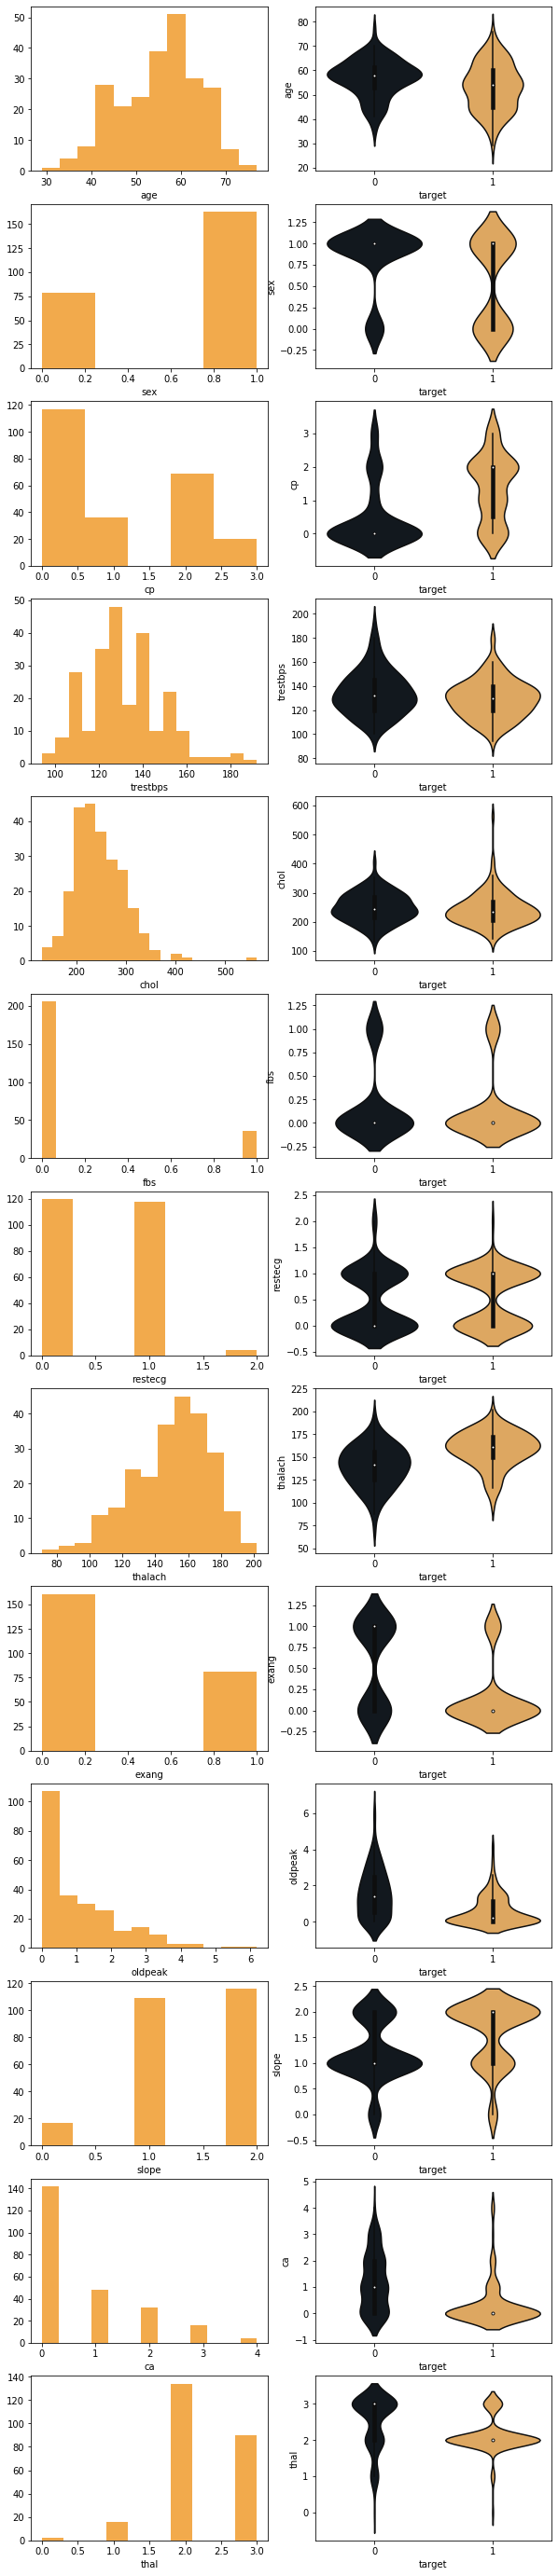

In [52]:
import seaborn as sns
# Splitting data for visualizing purpose only as we need to keep them as dataframe not an array. 
# They will not be used in modelling part

x_data = data.loc[:, data.columns != "target"]
y_data = data[["target"]]
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,
                                                    test_size=0.2,
                                                    random_state=0)

x_train.reset_index(drop=True, inplace=True);
y_train.reset_index(drop=True, inplace=True);


feature_names = x_train.columns

fig, axes = plt.subplots(len(x_train.columns), 2, figsize=(10,50))

for i, f in enumerate(x_train.columns):
    sns.distplot(x_train[f], kde = False, color = "#f2aa4c",
                 hist_kws = dict(alpha=1), ax=axes[i][0]);
    sns.violinplot(x=y_train["target"], y=x_train[f],
                 palette = ["#101820", "#f2aa4c"], ax=axes[i][1]);

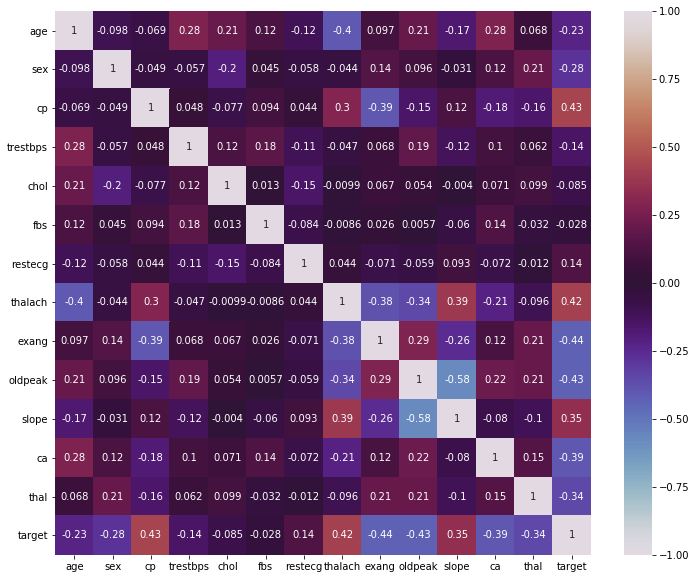

In [76]:
corr_matrix = data.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,  vmin=-1,
            vmax=1,center=0, cmap="twilight");

# Data preperation

In [78]:
a = pd.get_dummies(data['cp'], prefix = "cp")
b = pd.get_dummies(data['thal'], prefix = "thal")
c = pd.get_dummies(data['slope'], prefix = "slope")

In [80]:
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [81]:
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head() 

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [83]:
y = data.target.values
x_data = data.drop(['target'], axis = 1)

In [86]:
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values


In [87]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

### Modelling. SVM Classifier with Linear Kernel

In [88]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state=0)
classifier.fit(x_train, y_train)



SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [89]:
classifier.support_vectors_

array([[0.70833333, 0.        , 0.28301887, ..., 0.        , 1.        ,
        0.        ],
       [0.58333333, 1.        , 0.56603774, ..., 0.        , 0.        ,
        1.        ],
       [0.625     , 1.        , 0.37735849, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.52083333, 1.        , 0.24528302, ..., 0.        , 1.        ,
        0.        ],
       [0.35416667, 1.        , 0.06603774, ..., 0.        , 0.        ,
        1.        ],
       [0.5625    , 1.        , 0.24528302, ..., 0.        , 1.        ,
        0.        ]])

In [90]:
classifier.intercept_

array([0.9621081])

In [92]:
classifier.coef_

array([[-0.18267393, -0.72042546, -0.50847878, -0.27609653,  0.16353938,
         0.18551278,  1.0347364 , -0.5253719 , -1.11763066, -1.89658233,
        -0.29034155, -0.08918996,  0.04835482,  0.33117669, -0.13159073,
        -0.10302646,  0.40364704, -0.16902984,  0.05756187, -0.15991139,
         0.10234953, -0.29034155, -0.08918996,  0.04835482,  0.33117669,
        -0.13159073, -0.10302646,  0.40364704, -0.16902984,  0.05756187,
        -0.15991139,  0.10234953]])

In [94]:
y_pred = classifier.predict(x_test)

y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [95]:
# Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)


[[23  4]
 [ 5 29]]
Accuracy score: 0.8524590163934426
Precision score: 0.8787878787878788
Recall score: 0.8529411764705882


In [96]:
print("Classification Report for SVM:""\n",metrics.classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.88      0.85      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Text(0.5, 1.0, 'SVM Decision Region Boundary')

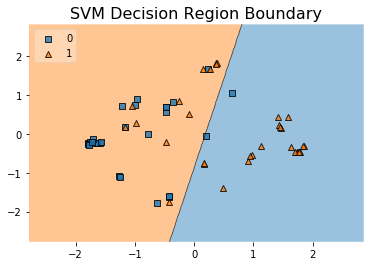

In [101]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
X_test2 = pca.fit_transform(x_test)
classifier.fit(X_train2, y_train)
plot_decision_regions(X_test2, y_test, clf=classifier, legend=2)


plt.title('SVM Decision Region Boundary', size=16)

# Support Vector Machines - Kernel RBF

In [102]:
# Fit SCV Classifier
from sklearn.svm import SVC
classifier = SVC( kernel="rbf", random_state=0)
classifier.fit(x_train, y_train)

# Predict
y_pred = classifier.predict(x_test)

from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[22  5]
 [ 4 30]]
Accuracy score: 0.8524590163934426
Precision score: 0.8571428571428571
Recall score: 0.8823529411764706


In [103]:
print("Classification Report for SVM:""\n",metrics.classification_report(y_test, y_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



Text(0.5, 1.0, 'SVM Decision Region Boundary')

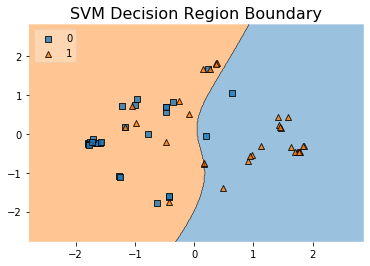

In [104]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
X_test2 = pca.fit_transform(x_test)
classifier.fit(X_train2, y_train)
plot_decision_regions(X_test2, y_test, clf=classifier, legend=2)


plt.title('SVM Decision Region Boundary', size=16)

### Logistic Regression

In [105]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver="liblinear")
classifier.fit(x_train, y_train)


# Predict
y_pred = classifier.predict(x_test)

# Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)
print("Classification Report for Logistic Regression:""\n",metrics.classification_report(y_test, y_pred))

[[23  4]
 [ 4 30]]
Accuracy score: 0.8688524590163934
Precision score: 0.8823529411764706
Recall score: 0.8823529411764706
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Text(0.5, 1.0, 'Logistic Regression Decision Region Boundary')

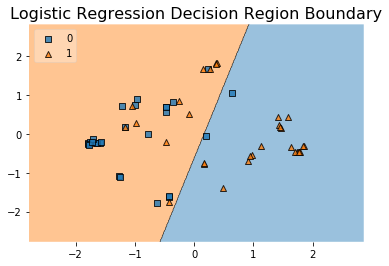

In [106]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components = 2)

X_train2 = pca.fit_transform(x_train)
X_test2 = pca.fit_transform(x_test)

classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test, clf=classifier, legend=2)


plt.title('Logistic Regression Decision Region Boundary', size=16)

### Decision Tree

In [107]:
# Fit the classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier.fit(x_train, y_train)

# Predict
y_pred = classifier.predict(x_test)


# Evaluate the model performance
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)
print("Classification Report for Decision Tree Classifier:""\n",metrics.classification_report(y_test, y_pred))

[[22  5]
 [12 22]]
Accuracy score: 0.7213114754098361
Precision score: 0.8148148148148148
Recall score: 0.6470588235294118
Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.65      0.81      0.72        27
           1       0.81      0.65      0.72        34

    accuracy                           0.72        61
   macro avg       0.73      0.73      0.72        61
weighted avg       0.74      0.72      0.72        61



[Text(836.9999999999999, 1494.8999999999999, 'X[16] <= 0.5\nentropy = 0.995\nsamples = 242\nvalue = [111, 131]'),
 Text(504.3461538461538, 1223.1, 'X[9] <= 0.125\nentropy = 0.796\nsamples = 108\nvalue = [82, 26]'),
 Text(321.9230769230769, 951.3, 'X[7] <= 0.5\nentropy = 0.995\nsamples = 48\nvalue = [26, 22]'),
 Text(171.69230769230768, 679.4999999999999, 'X[0] <= 0.458\nentropy = 0.871\nsamples = 24\nvalue = [7, 17]'),
 Text(85.84615384615384, 407.6999999999998, 'X[3] <= 0.208\nentropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(42.92307692307692, 135.89999999999986, '\n  (...)  \n'),
 Text(128.76923076923077, 135.89999999999986, '\n  (...)  \n'),
 Text(257.53846153846155, 407.6999999999998, 'X[6] <= 0.626\nentropy = 0.523\nsamples = 17\nvalue = [2, 15]'),
 Text(214.61538461538458, 135.89999999999986, '\n  (...)  \n'),
 Text(300.46153846153845, 135.89999999999986, '\n  (...)  \n'),
 Text(472.15384615384613, 679.4999999999999, 'X[3] <= 0.261\nentropy = 0.738\nsamples = 24\nvalue = [19

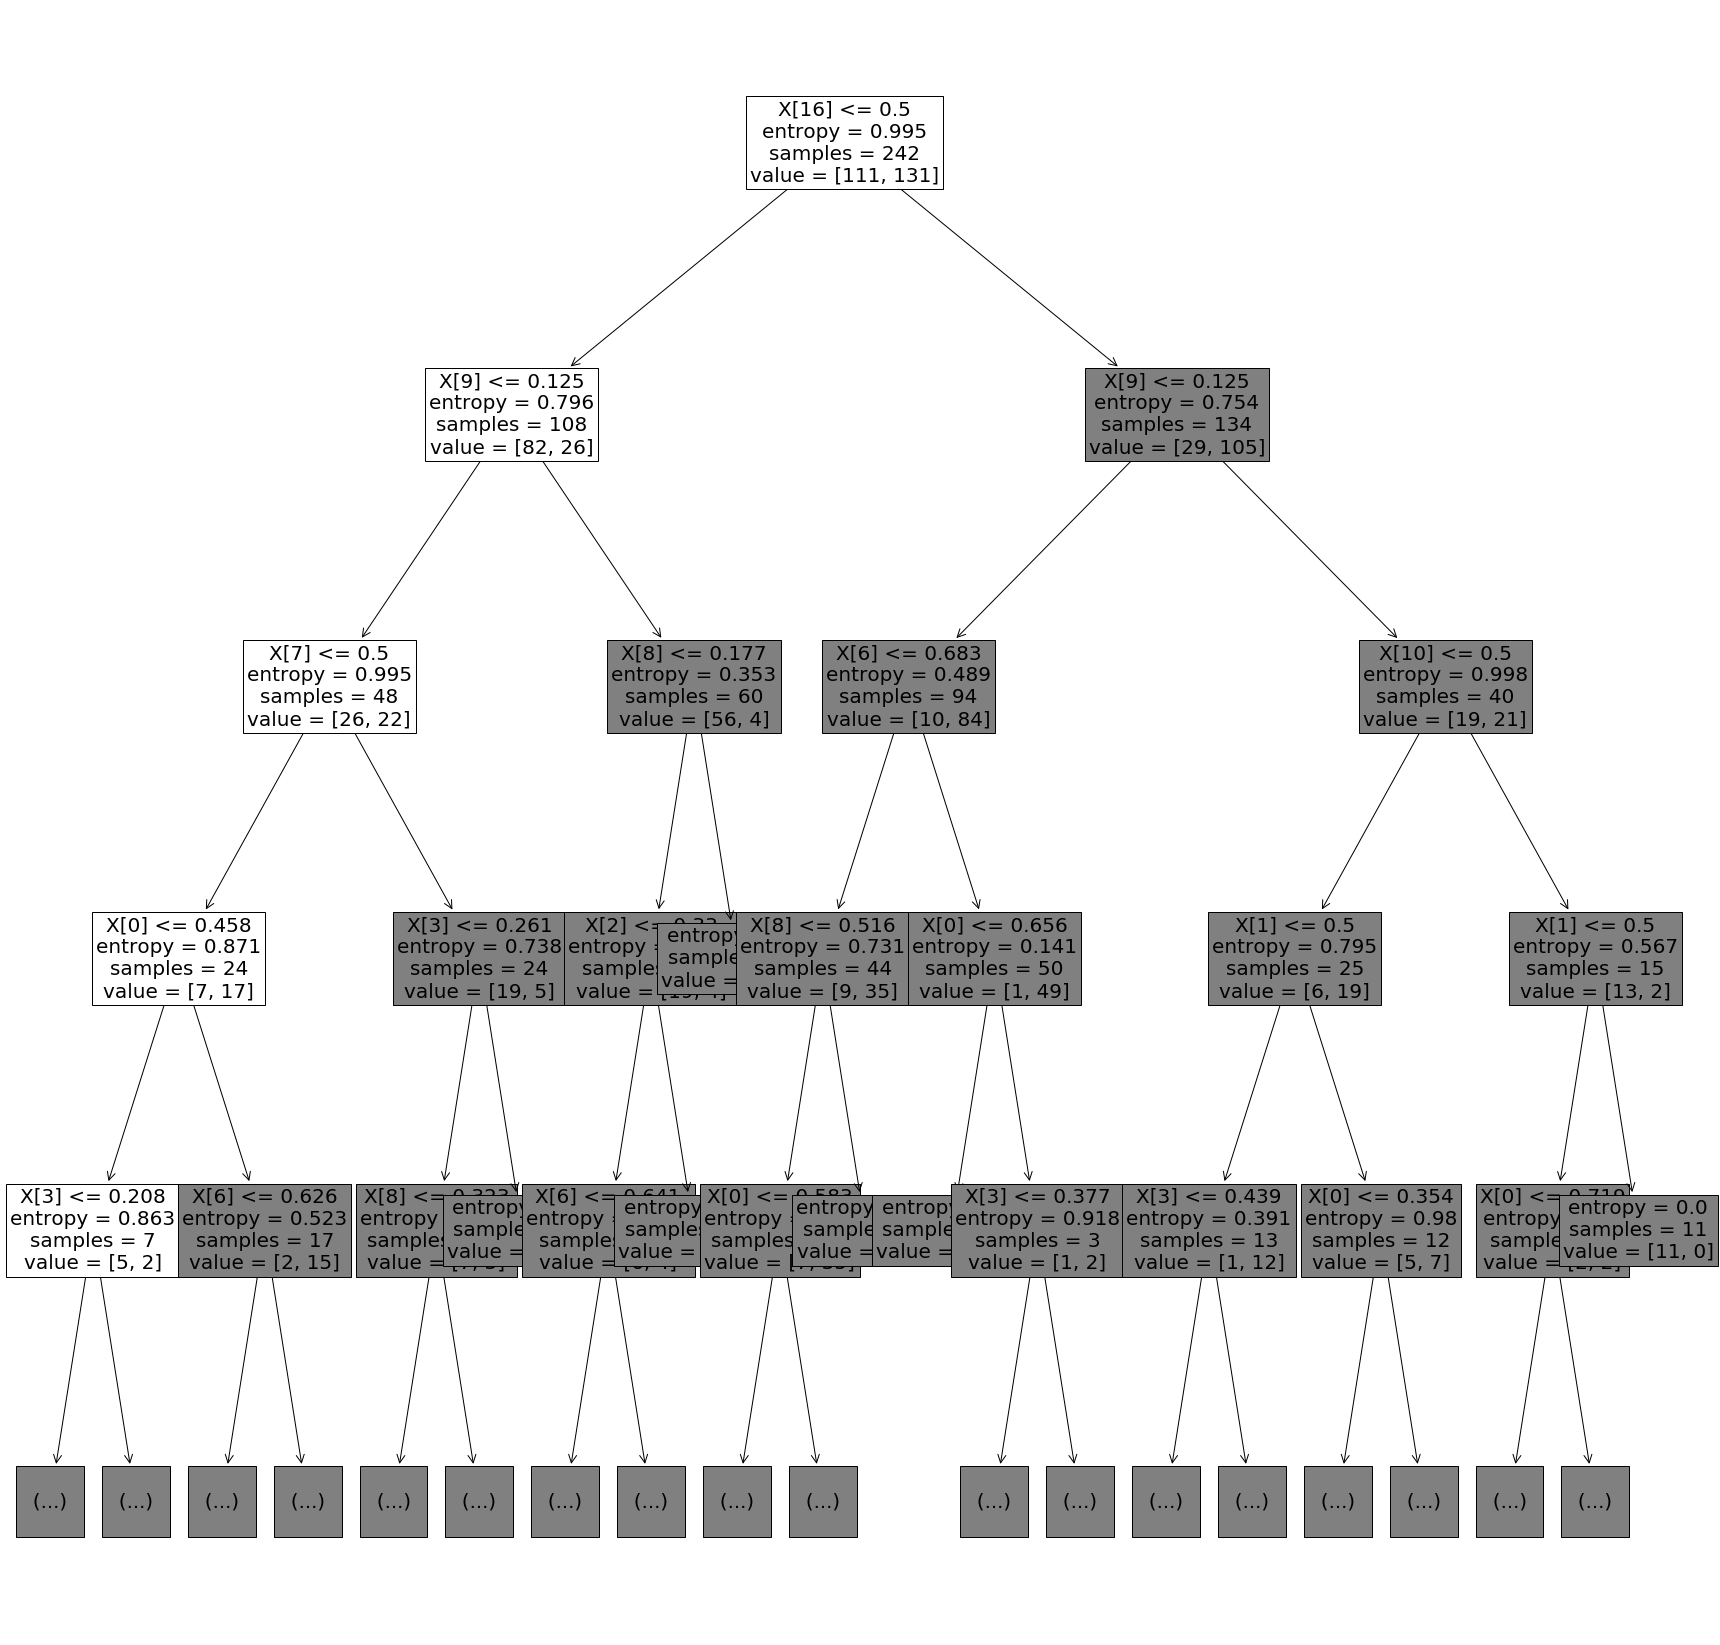

In [108]:
from sklearn import tree

fig, axes = plt.subplots(figsize = (30,30))

tree.plot_tree(classifier.fit(x_train, y_train), max_depth=4, fontsize=20)


In [109]:
# Save the tree as pdf . You can save it as a picture file too, i.e., (.png, .jpg, etc.)
fig.savefig('imagename.pdf')


Text(0.5, 1.0, 'Decision Tree Decision Region Boundary')

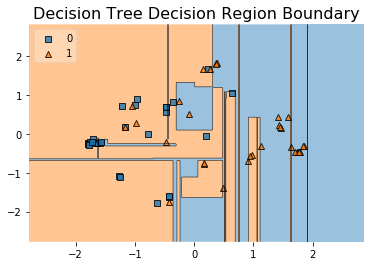

In [110]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components = 2)

X_train2 = pca.fit_transform(x_train)
X_test2 = pca.fit_transform(x_test)

classifier.fit(X_train2, y_train)

plot_decision_regions(X_test2, y_test, clf=classifier, legend=2)


plt.title('Decision Tree Decision Region Boundary', size=16)

### RandomForest Classifier

In [112]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=0)
classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)



from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

print("Classification Report for Random Forest:""\n",metrics.classification_report(y_test, y_pred))

[[23  4]
 [ 4 30]]
Accuracy score: 0.8688524590163934
Precision score: 0.8823529411764706
Recall score: 0.8823529411764706
Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.88      0.88      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Text(0.5, 1.0, 'Random Forest Decision Region Boundary')

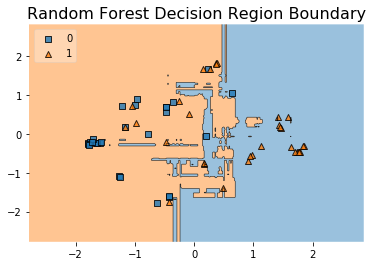

In [113]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
X_test2 = pca.fit_transform(x_test)

classifier.fit(X_train2, y_train)
plot_decision_regions(X_test2, y_test, clf=classifier, legend=2)


plt.title('Random Forest Decision Region Boundary', size=16)

### KNN Classifier

In [114]:
# Fit KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
# metric = minkowski and p=2 is Euclidean Distance
# metric = minkowski and p=1 is Manhattan Distance
classifier = KNeighborsClassifier(n_neighbors=9, metric="minkowski",p=2)
classifier.fit(x_train, y_train)

# Make Prediction
y_pred = classifier.predict(x_test)

# Confusion Matrix

# Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)


[[23  4]
 [ 4 30]]
Accuracy score: 0.8688524590163934
Precision score: 0.8823529411764706
Recall score: 0.8823529411764706


Text(0.5, 1.0, 'KNN Decision Region Boundary')

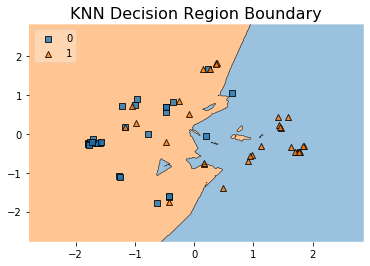

In [115]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
X_test2 = pca.fit_transform(x_test)

classifier.fit(X_train2, y_train)
plot_decision_regions(X_test2, y_test, clf=classifier, legend=2)


plt.title('KNN Decision Region Boundary', size=16)

### Naive Bayes Classifier

In [117]:
# Fit the classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predict
y_pred = classifier.predict(x_test)

# Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
precision = metrics.precision_score(y_test, y_pred) 
print("Precision score:",precision)
recall = metrics.recall_score(y_test, y_pred) 
print("Recall score:",recall)

[[24  3]
 [ 6 28]]
Accuracy score: 0.8524590163934426
Precision score: 0.9032258064516129
Recall score: 0.8235294117647058


Text(0.5, 1.0, 'Naive Bayes Decision Region Boundary')

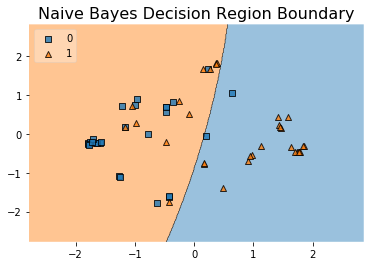

In [118]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions


pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train)
X_test2 = pca.fit_transform(x_test)

classifier.fit(X_train2, y_train)
plot_decision_regions(X_test2, y_test, clf=classifier, legend=2)


plt.title('Naive Bayes Decision Region Boundary', size=16)